In [ ]:
#Librerias usadas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

[ True  True  True  True  True  True  True  True  True False  True False
  True  True False False False  True False False  True  True  True  True
  True  True  True  True  True  True]
Mejor valor C: {'C': 100, 'solver': 'lbfgs'}
Puntuación media:  0.9571835443037976
[0.95471519 0.95718354 0.94968354 0.90699367 0.90702532]
Training scores: 0.97
Test scores: 0.98
[0.94736842 0.95614035 0.95614035 0.95614035 0.96460177]
Training scores: 0.96 0.01


Text(0.5, 36.72222222222221, 'y_pred')

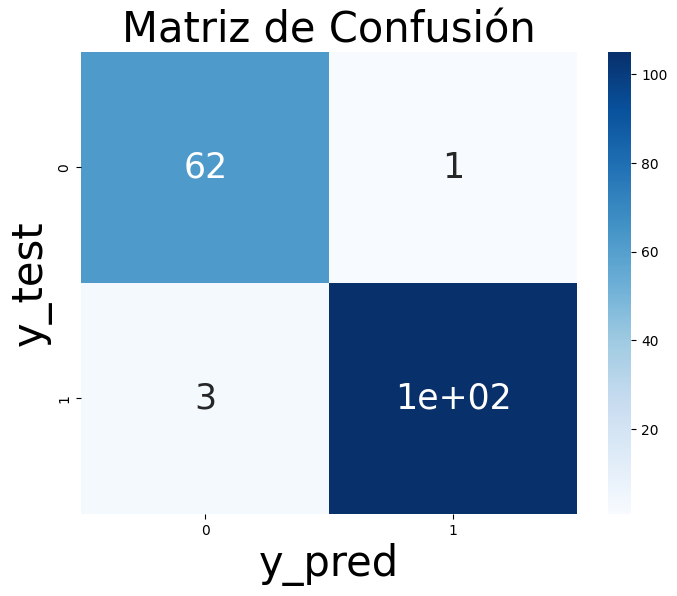

In [ ]:
#Regression Logistica

scaler = StandardScaler()

data = load_breast_cancer()

X = data.data
y = data.target

k = 23
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(X, y)

print(selector.get_support())

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

parameters = {
    'C': [100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
log_reg = LogisticRegression(max_iter=10000)
grid_search = GridSearchCV(log_reg, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_log_reg = grid_search.best_estimator_

print('Mejor valor C:', grid_search.best_params_)
print('Puntuación media: ', grid_search.best_score_)
print(grid_search.cv_results_['mean_test_score'])

model_LogReg = LogisticRegression(max_iter=10000, solver='lbfgs', C=100)

model_LogReg.fit(X_train, y_train)

y_pred = model_LogReg.predict(X_test)

print("Training scores: {:.2f}".format(model_LogReg.score(X_train, y_train)))
print("Test scores: {:.2f}".format(model_LogReg.score(X_test,y_test)))

#Validación cruzada
scores = cross_val_score(model_LogReg, X_new, y, cv=5)
print(scores)
print("Training scores: {:.2f} {:.2f}".format(scores.mean(), scores.std() * 2))

#Matriz de confusión
cm = confusion_matrix(y_test, y_pred,)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap="Blues",annot_kws={'fontsize': 25})
plt.title('Matriz de Confusión', fontsize=30)
plt.ylabel('y_test', fontsize=30)
plt.xlabel('y_pred', fontsize=30)

Training scores: 1.00
Test scores: 0.94
[0.9122807  0.92105263 0.92105263 0.94736842 0.92920354]
Training scores: 0.93 0.02


Text(0.5, 36.72222222222221, 'y_pred')

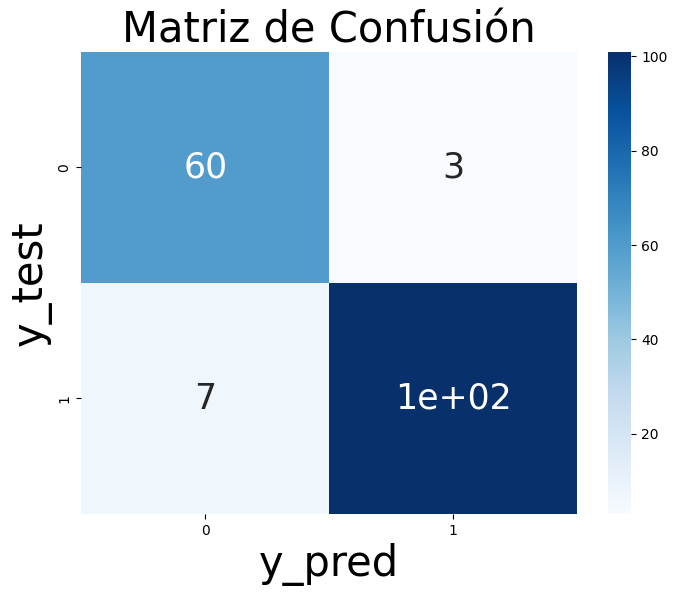

In [ ]:
#Decision Tree

data = load_breast_cancer()

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)



print("Training scores: {:.2f}".format(decision_tree.score(X_train, y_train)))
print("Test scores: {:.2f}".format(decision_tree.score(X_test,y_test)))

#Validación cruzada
scores = cross_val_score(decision_tree, X_new, y, cv=5)
print(scores)
print("Training scores: {:.2f} {:.2f}".format(scores.mean(), scores.std() * 2))

#Matriz de confusión
cm = confusion_matrix(y_test, y_pred,)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap="Blues",annot_kws={'fontsize': 25})
plt.title('Matriz de Confusión', fontsize=30)
plt.ylabel('y_test', fontsize=30)
plt.xlabel('y_pred', fontsize=30)


Training scores: 1.00
Test scores: 0.97
[0.92105263 0.94736842 0.99122807 0.97368421 0.97345133]
Training scores: 0.96 0.05


Text(0.5, 36.72222222222221, 'y_pred')

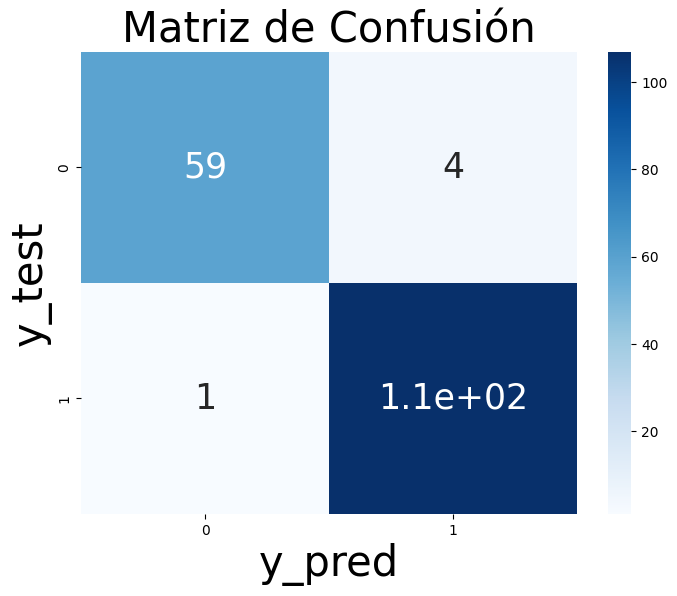

In [ ]:
#Random Forest

data = load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)


print("Training scores: {:.2f}".format(random_forest.score(X_train, y_train)))
print("Test scores: {:.2f}".format(random_forest.score(X_test,y_test)))

#Validación cruzada
scores = cross_val_score(random_forest, X_new, y, cv=5)
print(scores)
print("Training scores: {:.2f} {:.2f}".format(scores.mean(), scores.std() * 2))

#Matriz de confusión
cm = confusion_matrix(y_test, y_pred,)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap="Blues",annot_kws={'fontsize': 25})
plt.title('Matriz de Confusión', fontsize=30)
plt.ylabel('y_test', fontsize=30)
plt.xlabel('y_pred', fontsize=30)